# Moneyball Project: UEFA Euro 2020 Fantasy Football
Passion project to leverage data-driven decision making for team selection in [UEFA Euro 2020 Fantasy Football](https://gaming.uefa.com/en/uefaeuro2020fantasyfootball/overview)

## Modelling
-----------------------------
### Purpose
Project points and roi of player for matchday 3 of UEFA Euro 2020

### Author
[Christian Wibisono](https://github.com/christianwbsn)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from IPython.display import display

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row',50)

In [2]:
DATA_DIR = '../data'

In [3]:
data = pd.read_csv("{}/processed/dataset_md3.csv".format(DATA_DIR))

In [4]:
train = data[~pd.isnull(data["points"])]
train["roi"] = train["roi"].fillna(0)
test = data[pd.isnull(data["points"])]
test = test.drop_duplicates(subset=["player", "date"], keep="first")
test = test.reset_index(drop=True)

<ipython-input-4-3198189a0046>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["roi"] = train["roi"].fillna(0)


In [5]:
eval_md_2 = train[(train["league_name"] == "European Championship 2020") & (train["date"] >= "2021-06-16")]

In [6]:
eval_md_2 = eval_md_2.sort_values(by=["points"], ascending=False)

In [7]:
eval_md_2[eval_md_2["position"] == "GK"].head(10)

,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate
7703,Stole Dimitrievski,2021-06-17 15:00:00,European Championship 2020,North Macedonia,Ukraine,0.0,90.0,GK,2021,6,17,8.0,4.5,1.0,2.0,0.0,0.0,3.434783,0.0,0.0,7.0,2.408811,0.0,0.0,90.0,1.0000,23.0,0.0,0.0,0.347826,28.0,NaN,NaN,NaN,0.821429,62,62,1374,22,24,1514,0.0,2.0,0.0,0.0,3.0,2.0,27.6,6.180000e+08,23800000.0,26.4,1.972000e+09,75800000.0,26.0,188.0,81.0,2.0,71.0,75.0,4000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,20.0,14.0,23.0,15.0,18.0,17.0,17.0,27.0,19.0,35.0,38.0,44.0,62.0,43.0,51.0,60.0,40.0,72.0,17.0,17.0,21.0,15.0,51.0,21.0,53.0,19.0,17.0,72.0,70.0,68.0,74.0,70.0,-140,38,-1.354000e+09,-52000000.0,1.2,False,True,4.0,1.777778,False,Medium,Medium
2581,Georgi Bushchan,2021-06-17 15:00:00,European Championship 2020,Ukraine,North Macedonia,0.0,90.0,GK,2021,6,17,8.0,4.5,1.0,2.0,0.0,0.0,3.000000,0.0,0.0,8.0,2.683282,0.0,0.0,90.0,1.0000,6.0,0.0,0.0,0.166667,26.0,NaN,NaN,NaN,0.230769,22,24,1514,62,62,1374,2.0,0.0,0.0,3.0,0.0,2.0,26.4,1.972000e+09,75800000.0,27.6,6.180000e+08,23800000.0,26.0,196.0,93.0,1.0,72.0,77.0,500.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,5.0,10.0,23.0,7.0,14.0,13.0,11.0,29.0,15.0,24.0,32.0,35.0,74.0,24.0,55.0,38.0,18.0,73.0,8.0,24.0,10.0,6.0,35.0,13.0,36.0,10.0,11.0,72.0,65.0,73.0,69.0,74.0,140,-38,1.354000e+09,52000000.0,-1.2,False,True,5.0,1.777778,True,Medium,Medium
1473,Danny Ward,2021-06-16 18:00:00,European Championship 2020,Wales,Turkey,0.0,90.0,GK,2021,6,16,7.0,4.5,1.0,3.0,0.0,0.0,3.888889,0.0,0.0,7.0,2.571208,0.0,0.0,90.0,1.0000,9.0,0.0,0.0,0.444444,28.0,NaN,NaN,NaN,0.321429,17,17,1570,29,29,1505,0.0,0.0,0.0,0.0,0.0,NaN,25.6,1.767500e+09,68000000.0,25.0,3.250000e+09,125000000.0,27.0,191.0,88.0,1.0,74.0,75.0,43000.0,1.0,NaN,NaN,NaN,NaN,NaN,SUB,12.0,NaN,13.0,11.0,13.0,30.0,13.0,19.0,15.0,14.0,42.0,23.0,46.0,44.0,38.0,70.0,53.0,50.0,67.0,22.0,60.0,16.0,32.0,20.0,7.0,38.0,20.0,56.0,20.0,18.0,75.0,72.0,66.0,73.0,75.0,65,-12,-1.482500e+09,-57000000.0,0.6,True,True,1.0,1.555556,False,Medium,Medium
6938,Robin Olsen,2021-06-18 15:00:00,European Championship 2020,Sweden,Slovakia,0.0,90.0,GK,2021,6,18,6.0,5.0,1.0,7.0,0.0,0.0,3.850000,0.0,0.0,7.0,2.323224,0.0,0.0,90.0,1.

In [8]:
eval_md_2[eval_md_2["position"] == "D"].head(10)

,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate
6903,Robin Gosens,2021-06-19 18:00:00,European Championship 2020,Germany,Portugal,0.0,90.0,D,2021,6,19,14.0,5.0,2.0,2.0,0.0,0.0,1.500000,0.0,0.166667,5.0,2.073644,0.000000,0.408248,67.5,0.833333,6.0,0.000000,0.166667,0.000000,28.0,NaN,NaN,NaN,0.214286,1,12,1609,3,5,1666,2.0,0.0,0.0,5.0,0.0,4.0,27.6,9.365000e+09,360200000.0,27.9,8.725000e+09,335600000.0,25.0,183.0,76.0,1.0,82.0,82.0,68000.0,1.0,83.0,74.0,78.0,77.0,77.0,LM,3.0,80.0,82.0,77.0,78.0,80.0,71.0,78.0,70.0,58.0,77.0,79.0,84.0,82.0,70.0,84.0,66.0,76.0,91.0,86.0,76.0,68.0,80.0,77.0,84.0,77.0,50.0,75.0,78.0,79.0,7.0,16.0,15.0,16.0,10.0,-57,7,6.400000e+08,24600000.0,-0.3,False,False,0.0,2.800000,True,High,High
1757,Denzel Dumfries,2021-06-17 21:00:00,European Championship 2020,Netherlands,Austria,0.0,90.0,D,2021,6,17,14.0,5.5,2.0,7.0,1.0,0.0,3.166667,0.0,0.111111,8.0,2.727852,0.235702,0.471405,69.0,0.777778,18.0,0.055556,0.055556,0.277778,28.0,NaN,NaN,NaN,0.642857,12,16,1598,22,23,1523,2.0,0.0,0.0,5.0,1.0,2.0,27.2,6.370500e+09,245000000.0,27.9,3.206000e+09,123300000.0,24.0,188.0,80.0,1.0,79.0,83.0,18000.0,2.0,79.0,60.0,66.0,71.0,76.0,RB,22.0,89.0,76.0,64.0,83.0,72.0,28.0,71.0,50.0,40.0,65.0,74.0,76.0,82.0,68.0,75.0,53.0,66.0,90.0,92.0,89.0,54.0,83.0,72.0,73.0,59.0,42.0,70.0,79.0,75.0,10.0,10.0,7.0,13.0,14.0,75,-7,3.164500e+09,121700000.0,-0.7,False,False,4.0,2.545455,True,High,High
1249,Connor Roberts,2021-06-16 18:00:00,European Championship 2020,Wales,Turkey,0.0,90.0,D,2021,6,16,12.0,4.5,2.0,2.0,0.0,0.0,3.750000,0.0,0.125000,6.0,1.982062,0.000000,0.353553,90.0,1.000000,8.0,0.000000,0.125000,0.375000,28.0,NaN,NaN,NaN,0.285714,17,17,1570,29,29,1505,0.0,0.0,0.0,0.0,0.0,NaN,25.6,1.767500e+09,68000000.0,25.0,3.250000e+09,125000000.0,24.0,175.0,71.0,2.0,72.0,77.0,16000.0,1.0,71.0,38.0,62.0,66.0,68.0,RB,2.0,68.0,68.0,35.0,53.0,71.0,20.0,65.0,42.0,18.0,58.0,64.0,72.0,70.0,71.0,68.0,70.0,43.0,61.0,83.0,65.0,36.0,58.0,69.0,61.0,58.0,41.0,54.0,72.0,68.0,6.0,12.0,8.0,12.0,13.0,65,-12,-1.482500e+09,-57000000.0,0.6,False,True,5.0,2.666667,False,High,Medium
732,Attila Fiola,2021-06-19 15:00:00,European Championship 2020,Hungary,France,0.0,90.0,D,2021,

In [9]:
eval_md_2[eval_md_2["position"] == "M"].head(10)

,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate
4906,Manuel Locatelli,2021-06-16 21:00:00,European Championship 2020,Italy,Switzerland,0.0,90.0,M,2021,6,16,14.0,5.5,3.0,3.0,0.0,0.0,3.300000,0.0,0.200000,6.0,1.636392,0.316228,0.421637,87.0,0.700000,10.0,0.100000,0.200000,0.700000,28.0,NaN,NaN,NaN,0.357143,7,7,1642,6,13,1606,0.0,0.0,1.0,1.0,1.0,0.0,27.8,7.640000e+09,293800000.0,27.0,2.835000e+09,109000000.0,22.0,180.0,70.0,1.0,78.0,84.0,27000.0,1.0,57.0,64.0,75.0,74.0,77.0,SUB,22.0,69.0,72.0,54.0,68.0,79.0,64.0,75.0,66.0,60.0,77.0,79.0,56.0,58.0,65.0,73.0,56.0,76.0,57.0,72.0,68.0,75.0,70.0,79.0,57.0,77.0,60.0,68.0,78.0,75.0,11.0,12.0,11.0,10.0,15.0,36,-6,4.805000e+09,184800000.0,0.8,False,False,6.0,2.545455,False,Medium,Medium
1788,Diogo Jota,2021-06-19 18:00:00,European Championship 2020,Portugal,Germany,0.0,90.0,M,2021,6,19,10.0,8.5,3.0,0.0,0.0,0.0,3.928571,0.0,0.142857,15.0,4.483632,0.731705,0.351500,31.5,0.428571,13.0,0.285714,0.142857,0.214286,28.0,NaN,NaN,NaN,0.464286,3,5,1666,1,12,1609,0.0,2.0,0.0,0.0,5.0,4.0,27.9,8.725000e+09,335600000.0,27.6,9.365000e+09,360200000.0,23.0,178.0,73.0,1.0,80.0,86.0,90000.0,2.0,83.0,77.0,71.0,84.0,53.0,SUB,20.0,77.0,68.0,77.0,52.0,72.0,75.0,84.0,76.0,58.0,68.0,84.0,88.0,79.0,87.0,82.0,86.0,82.0,66.0,79.0,73.0,74.0,85.0,54.0,82.0,74.0,63.0,84.0,54.0,44.0,7.0,12.0,15.0,9.0,11.0,57,-7,-6.400000e+08,-24600000.0,0.3,False,False,6.0,1.176471,False,High,High
4135,Kevin De Bruyne,2021-06-17 18:00:00,European Championship 2020,Belgium,Denmark,0.0,90.0,M,2021,6,17,10.0,10.5,3.0,0.0,0.0,0.0,6.769231,0.0,0.769231,17.0,5.002563,0.660225,1.012739,90.0,0.923077,13.0,0.384615,0.461538,0.461538,28.0,1.0,10.0,10.0,0.464286,1,1,1783,9,10,1631,2.0,0.0,0.0,6.0,2.0,2.0,29.2,6.694000e+09,257500000.0,27.7,3.107000e+09,119500000.0,29.0,181.0,70.0,1.0,91.0,91.0,370000.0,4.0,76.0,86.0,93.0,88.0,64.0,RCM,7.0,78.0,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,92.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,84.0,91.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,152,-9,3.587000e+09,138000000.0,1.5,False,False,0.0,0.952381,True,High,High
518,Andriy Yarmolenko,2021-06-17 15:00:00,European Championship 2020,Ukraine,North 

In [10]:
eval_md_2[eval_md_2["position"] == "F"].head(10)

,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate
2571,Gareth Bale,2021-06-16 18:00:00,European Championship 2020,Wales,Turkey,0.0,90.0,F,2021,6,16,9.0,9.5,3.0,2.0,0.0,0.0,3.285714,0.0,0.285714,9.0,2.411283,0.402374,0.462910,90.0,0.857143,21.0,0.190476,0.285714,0.238095,28.0,NaN,NaN,NaN,0.750000,17,17,1570,29,29,1505,0.0,0.0,0.0,0.0,0.0,NaN,25.6,1.767500e+09,68000000.0,25.0,3.250000e+09,125000000.0,30.0,185.0,82.0,1.0,83.0,83.0,130000.0,4.0,88.0,84.0,82.0,80.0,58.0,RM,11.0,73.0,87.0,81.0,84.0,80.0,85.0,80.0,90.0,87.0,79.0,83.0,86.0,89.0,78.0,79.0,65.0,90.0,82.0,69.0,77.0,87.0,65.0,59.0,83.0,79.0,76.0,85.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,65,-12,-1.482500e+09,-57000000.0,0.6,True,True,0.0,0.947368,False,Medium,Medium
1303,Cristiano Ronaldo,2021-06-19 18:00:00,European Championship 2020,Portugal,Germany,0.0,90.0,F,2021,6,19,9.0,12.1,4.0,10.0,2.0,0.0,5.950000,1.0,0.050000,18.0,5.020746,1.213954,0.223607,90.0,0.950000,20.0,0.550000,0.050000,0.500000,28.0,NaN,NaN,NaN,0.714286,3,5,1666,1,12,1609,0.0,2.0,0.0,0.0,5.0,4.0,27.9,8.725000e+09,335600000.0,27.6,9.365000e+09,360200000.0,35.0,187.0,83.0,1.0,92.0,92.0,220000.0,5.0,89.0,93.0,81.0,89.0,35.0,LS,7.0,77.0,84.0,95.0,90.0,82.0,86.0,88.0,81.0,76.0,77.0,92.0,87.0,91.0,87.0,95.0,71.0,94.0,95.0,84.0,78.0,93.0,63.0,29.0,95.0,82.0,84.0,95.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,57,-7,-6.400000e+08,-24600000.0,0.3,True,False,0.0,0.743802,False,High,Low
6287,Patrik Schick,2021-06-18 18:00:00,European Championship 2020,Czech Republic,Croatia,0.0,90.0,F,2021,6,18,8.0,8.2,4.0,11.0,2.0,0.0,4.533333,1.0,0.133333,12.0,4.085981,0.723747,0.516398,78.0,0.866667,15.0,0.533333,0.066667,0.266667,27.0,NaN,NaN,NaN,0.555556,40,40,1458,4,14,1605,0.0,1.0,1.0,4.0,6.0,2.0,27.4,1.900000e+09,73100000.0,27.8,3.758000e+09,144500000.0,24.0,186.0,73.0,1.0,78.0,84.0,55000.0,2.0,70.0,76.0,71.0,81.0,37.0,ST,19.0,67.0,64.0,79.0,80.0,78.0,74.0,82.0,78.0,56.0,62.0,83.0,71.0,70.0,83.0,76.0,67.0,74.0,68.0,64.0,72.0,74.0,59.0,25.0,80.0,73.0,58.0,73.0,24.0,19.0,11.0,15.0,8.0,9.0,14.0,-147,26,-1.858000e+09,-71400000.0,-0.4,False,True,6.0,0.975610,False,Medium,Medium
1221,Ciro Immobile,2021-06-16 21:00:00,European Championship 2020,Italy,Switzerl

In [11]:
train.shape

(8278, 114)

In [12]:
test.shape

(615, 114)

In [13]:
train.head()

,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate
0,Aaron Ramsey,2018-09-06 00:00:00,UEFA Nations League,Wales,Republic of Ireland,21.00,90.0,M,2018,9,6,7.0,8.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,19,1536,26,29,1484,0.0,2.0,2.0,0.0,4.0,3.0,25.6,1.767500e+09,68000000.0,25.5,7.765000e+08,29900000.0,26.0,183.0,76.0,1.0,82.0,83.0,130000.0,3.0,68.0,75.0,79.0,81.0,65.0,RF,10.0,75.0,75.0,72.0,58.0,84.0,79.0,81.0,70.0,70.0,80.0,82.0,67.0,68.0,76.0,81.0,75.0,81.0,67.0,89.0,69.0,74.0,73.0,69.0,82.0,80.0,75.0,81.0,70.0,67.0,6.0,11.0,5.0,10.0,8.0,52,-10,9.910000e+08,38100000.0,0.1,True,False,1.0,0.823529,False,High,High
1,Aaron Ramsey,2018-09-09 00:00:00,UEFA Nations League,Wales,Denmark,13.50,90.0,M,2018,9,9,2.0,8.5,3.0,7.0,1.0,0.0,7.000000,1.0,0.0,7.0,0.000000,0.000000,0.0,90.0,1.0,1.0,1.000000,0.0,0.0,1.0,NaN,NaN,NaN,1.00,18,19,1536,9,9,1580,0.0,0.0,0.0,0.0,0.0,NaN,25.6,1.767500e+09,68000000.0,27.8,3.107000e+09,119500000.0,26.0,183.0,76.0,1.0,82.0,83.0,130000.0,3.0,68.0,75.0,79.0,81.0,65.0,RF,10.0,75.0,75.0,72.0,58.0,84.0,79.0,81.0,70.0,70.0,80.0,82.0,67.0,68.0,76.0,81.0,75.0,81.0,67.0,89.0,69.0,74.0,73.0,69.0,82.0,80.0,75.0,81.0,70.0,67.0,6.0,11.0,5.0,10.0,8.0,-44,10,-1.339500e+09,-51500000.0,-2.2,True,False,1.0,0.235294,False,High,High
2,Aaron Ramsey,2018-10-11 00:00:00,International Friendlies,Wales,Spain,1.42,90.0,M,2018,10,11,2.0,8.5,3.0,2.0,0.0,0.0,4.500000,0.5,0.0,7.0,2.672612,0.534522,0.0,90.0,1.0,2.0,0.500000,0.0,0.0,2.0,NaN,NaN,NaN,1.00,18,19,1536,6,9,1597,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,183.0,76.0,1.0,82.0,83.0,130000.0,3.0,68.0,75.0,79.0,81.0,65.0,RF,10.0,75.0,75.0,72.0,58.0,84.0,79.0,81.0,70.0,70.0,80.0,82.0,67.0,68.0,76.0,81.0,75.0,81.0,67.0,89.0,69.0,74.0,73.0,69.0,82.0,80.0,75.0,81.0,70.0,67.0,6.0,11.0,5.0,10.0,8.0,-61,10,NaN,NaN,NaN,False,False,1.0,0.235294,False,High,High
3,Aaron Ramsey,2018-11-16 00:00:00,UEFA Nations League,Wales,Denmark,2.96,90.0,M,2018,11,16,2.0,8.5,3.0,2.0,0.0,0.0,3.666667,0.0,0.0,7.0,2.461830,0.492366,0.0,90.0,1.0,3.0,0.333333,0.0,0.0,4.0,0.0,2.0,2.0,0.75,18,18,1538,9,10,1584,0.0,1.0,0.0,0.0,2.0,2.0,25.6,1.767500e+09,68000000.0,27.8,3.

In [14]:
train.columns

Index(['player', 'date', 'league_name', 'team_name', 'opponent_name',
       'fantasy_points', 'min', 'position', 'year', 'month',
       ...
       'diff_team_market_value', 'diff_team_mean_market_value',
       'diff_team_mean_squad_age', 'is_senior', 'is_imbalanced',
       'gap_to_potential', 'roi', 'more_likely_to_win', 'attacking_work_rate',
       'defending_work_rate'],
      dtype='object', length=114)

In [15]:
fifa_col = ['attacking_crossing','attacking_heading_accuracy', 'attacking_short_passing',
            'attacking_volleys', 'skill_dribbling', 'skill_curve', 'height_cm', 'weight_kg',
            'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
            'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
            'movement_reactions', 'movement_balance', 'power_shot_power',
            'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
            'mentality_aggression', 'mentality_interceptions',
            'mentality_positioning', 'mentality_vision', 'mentality_penalties',
            'mentality_composure', 'defending_standing_tackle',
            'defending_sliding_tackle', 'goalkeeping_diving',
            'goalkeeping_handling', 'goalkeeping_kicking',
            'goalkeeping_positioning', 'goalkeeping_reflexes', 'pace', 
            'dribbling', 'physic', 'attacking_finishing']

In [16]:
dropped_cols = ['player', 'league_name', 'date', 'year','points',
                'roi', 'value', 'min', 'nation_position', 'potential', 'age',
                'month', 'day', 'nation_jersey_number','team_name', 'opponent_name',
                'fantasy_points', 'prev_mean_goals', 'prev_median_min', "prev_std_goals",
                "prev_team_highest_rank" , "prev_opponent_highest_rank", "is_senior", "hth_draw"]

In [17]:
dropped_cols += fifa_col

In [18]:
def train_model(df, dropped_cols, label, model, need_fillna):
    X = pd.get_dummies(df.drop(dropped_cols, axis=1))
    if need_fillna:
        X = X.fillna(0)
    y = df[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    mae, mse = mean_absolute_error(y_test, prediction), mean_squared_error(y_test, prediction)
    print(model)
    print("MAE:", mae)
    print("MSE:", mse)

Need to find sweet spot between player consistency and speculation (The Mavericks) --> player with high volatility of points [http://www.frontier-economics.com/uk/en/news-and-articles/articles/article-i7337-how-to-win-your-fantasy-football-league/] 
* roi -> measuring value for money (find undervalued player)
* points --> measuring player consistency

In [19]:
model_roi = RandomForestRegressor(random_state=1)
train_model(train, dropped_cols, "roi", model_roi, True)

RandomForestRegressor(random_state=1)
MAE: 0.291321341999096
MSE: 0.16364045103537403


In [20]:
model_points = LGBMRegressor(random_state=1)
train_model(train, dropped_cols, "points", model_points, True)

LGBMRegressor(random_state=1)
MAE: 1.8805725154463382
MSE: 6.511361216174372


## The Dream Team

In [21]:
X_test = pd.get_dummies(test.drop(dropped_cols, axis=1))

In [22]:
def plotImp(model, X , num =20, fig_size = (9, 3)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title(str(model) +' Features')
    plt.tight_layout()
    plt.show()

In [23]:
def get_model(df, dropped_cols, label, model, need_fillna):
    X = pd.get_dummies(df.drop(dropped_cols, axis=1))
    if need_fillna:
        X = X.fillna(0)
    y = df[label]
    model.fit(X, y)
    print(X.columns)
    plotImp(model,X, 10)
    return model

Index(['skill', 'last_md_points', 'last_md_goals', 'last_md_assists',
       'prev_mean_points', 'prev_mean_assists', 'prev_max_points',
       'prev_std_points', 'prev_std_assists', 'prev_ratio_starter',
       'count_played', 'goal_consistency', 'assist_consistency',
       'clean_sheet_consistency', 'count_team_played',
       'prev_max_goal_to_specific_opp', 'prev_max_points_to_specific_opp',
       'prev_mean_points_to_specific_opp', 'prev_ratio_played', 'team_rank',
       'team_total_points', 'opponent_rank', 'opponent_total_points',
       'hth_team_win', 'hth_opp_win', 'hth_team_score', 'hth_opp_score',
       'htt_max_margin', 'team_mean_squad_age', 'team_market_value',
       'team_mean_market_value', 'opponent_mean_squad_age',
       'opponent_market_value', 'opponent_mean_market_value', 'league_rank',
       'overall', 'wage_eur', 'international_reputation', 'shooting',
       'passing', 'defending', 'diff_team_points', 'diff_team_ranking',
       'diff_team_market_value',

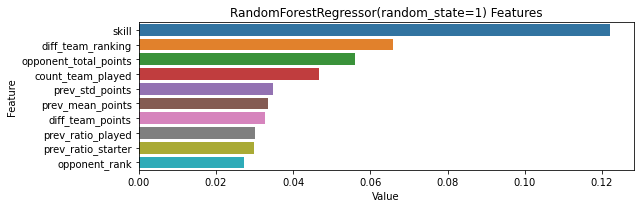

Index(['skill', 'last_md_points', 'last_md_goals', 'last_md_assists',
       'prev_mean_points', 'prev_mean_assists', 'prev_max_points',
       'prev_std_points', 'prev_std_assists', 'prev_ratio_starter',
       'count_played', 'goal_consistency', 'assist_consistency',
       'clean_sheet_consistency', 'count_team_played',
       'prev_max_goal_to_specific_opp', 'prev_max_points_to_specific_opp',
       'prev_mean_points_to_specific_opp', 'prev_ratio_played', 'team_rank',
       'team_total_points', 'opponent_rank', 'opponent_total_points',
       'hth_team_win', 'hth_opp_win', 'hth_team_score', 'hth_opp_score',
       'htt_max_margin', 'team_mean_squad_age', 'team_market_value',
       'team_mean_market_value', 'opponent_mean_squad_age',
       'opponent_market_value', 'opponent_mean_market_value', 'league_rank',
       'overall', 'wage_eur', 'international_reputation', 'shooting',
       'passing', 'defending', 'diff_team_points', 'diff_team_ranking',
       'diff_team_market_value',

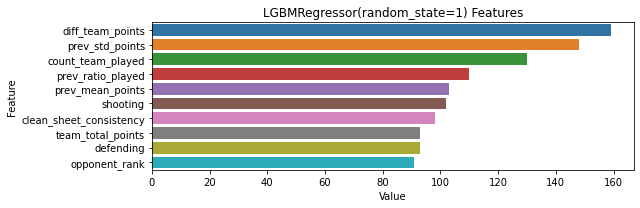

In [24]:
model_1 = get_model(train, dropped_cols, 'roi', model_roi, True)
model_2 = get_model(train, dropped_cols, 'points', model_points, True)

In [25]:
import shap
shap.initjs()

In [26]:
explainer = shap.Explainer(model_2)
shap_obj = explainer(X_test)

In [27]:
def player_to_watch(shap_obj, df, player_name):
    print("Evaluating points for: ", player_name)
    player = df[(df["player"] == player_name)][:1]
    display(player)
    shap.plots.waterfall(shap_obj[player.index[0]])

In [28]:
X_test

,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_assists,prev_max_points,prev_std_points,prev_std_assists,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,team_rank,team_total_points,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,league_rank,overall,wage_eur,international_reputation,shooting,passing,defending,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_imbalanced,gap_to_potential,more_likely_to_win,position_0,position_D,position_F,position_GK,position_M,attacking_work_rate_High,attacking_work_rate_Low,attacking_work_rate_Medium,defending_work_rate_High,defending_work_rate_Low,defending_work_rate_Medium
0,3.0,0.0,0.0,0.0,4.100000,0.000000,13.0,3.801484,0.000000,0.800000,10.0,0.300000,0.000000,0.300000,29.0,NaN,NaN,NaN,0.344828,17,1570,7,1642,0.0,0.0,0.0,0.0,NaN,25.6,1.767500e+09,68000000.0,27.8,7.640000e+09,293800000.0,1.0,82.0,98000.0,3.0,77.0,79.0,68.0,-72,10,-5.872500e+09,-225800000.0,-2.2,False,0.0,False,0,0,0,0,1,1,0,0,1,0,0
1,3.0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,1.000000,29.0,NaN,NaN,NaN,0.068966,4,1686,40,1458,1.0,1.0,6.0,2.0,5.0,25.4,1.250000e+10,498000000.0,27.4,1.900000e+09,73100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228,-36,1.060000e+10,424900000.0,-2.0,True,NaN,False,0,0,0,0,1,0,0,0,0,0,0
2,3.0,0.0,0.0,0.0,1.200000,0.200000,4.0,1.643168,0.447214,0.000000,5.0,0.000000,0.200000,0.000000,31.0,NaN,NaN,NaN,0.161290,29,1505,13,1606,0.0,0.0,0.0,0.0,NaN,25.0,3.250000e+09,125000000.0,27.0,2.835000e+09,109000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101,16,4.150000e+08,16000000.0,-2.0,True,NaN,False,0,0,0,0,1,0,0,0,0,0,0
3,1.0,0.0,0.0,0.0,0.500000,0.000000,1.0,0.577350,0.000000,0.000000,4.0,0.000000,0.000000,0.250000,29.0,NaN,NaN,NaN,0.137931,17,1570,7,1642,0.0,0.0,0.0,0.0,NaN,25.6,1.767500e+09,68000000.0,27.8,7.640000e+09,293800000.0,2.0,70.0,12000.0,1.0,NaN,NaN,NaN,-72,10,-5.872500e+09,-225800000.0,-2.2,False,3.0,False,0,0,0,1,0,0,0,1,0,0,1
4,4.0,0.0,0.0,0.0,0.500000,0.000000,1.0,0.707107,0.000000,0.000000,2.0,0.000000,0.000000,0.500000,28.0,NaN,NaN,NaN,0.071429,40,1458,4,1686,1.0,1.0,2.0,6.0,5.0,27.4,1.900000e+09,73100000.0,25.4,1.250000e+10,498000000.0,1.0,74.0,500.0,1.0,71.0,68.0,32.0,-228,36,-1.060000e+10,-424900000.0,2.0,True,13.0,False,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3.0,2.0,0.0,0.0,2.208333,0.041667,8.0,1.614585,0.204124,0.916667,24.0,0.041667,0.041667,0.250000,28.0,NaN,NaN,NaN,0.857143,37,1468,12,1609,0.0,2.0,0.0,5.0,3.0,28.1,7.485000e+08,28800000.0,27.6,9.365000e+09,360200000.0,2.0,72.0,29000.0,1.0,54.0,73.0,70.0,-141,25,-8.616500e+09,-331400000.0,0.5,True,5.0,False,0,0,0,0,1,0,0,1,1,0,0
611,4.0,1.0,0.0,0.0,3.269231,0.076923,10.0,2.324783,0.271746,0.923077,26.0,0.269231,0.076923,0.269231,28.0,NaN,NaN,NaN,0.928571,37,1468,12,1609,0.0,2.0,0.0,5.0,3.0,28.1,7.485000e+08,28800000.0,27.6,9.365000e+09,360200000.0,1.0,71.0,18000.0,2.0,71.0,59.0,39.0,-141,25,-8.616500e+09,-331400000.0,0.5,True,0.0,False,0,0,1,0,0,0,0,1,0,0,1
612,2.0,0.0,0.0,0.0,0.666667,0.000000,2.0,1.154701,0.000000,0.333333,3.0,0.000000,0.000000,0.000000,28.0,NaN,NaN,NaN,0.107143,37,1468,12,1609,0.0,2.0,0.0,5.0,3.0,28.1,7.485000e+08,28800000.0,27.6,9.365000e+09,360200000.0,1.0,64.0,2000.0,1.0,31.0,43.0,65.0,-141,25,-8.616500e+09,-331400000.0,0.5,True,8.0,False,0,1,0,0,0,0,1,0,0,0,1
613,4.0,6.0,1.0,0.0,3.388889,0.055556,10.0,2.6

In [29]:
test["predicted_roi"] = model_1.predict(X_test.fillna(0))
test["predicted_points"] = model_2.predict(X_test)

## Surfacing The Result

In [30]:
fantasy_euro = pd.read_csv("{}/interim/fantasy_euro.csv".format(DATA_DIR))

In [31]:
fantasy_euro = fantasy_euro[["player", "date", "league_name", "team_name", 
                             "opponent_name", "value", "skill", "sel_per"]]

In [32]:
players = pd.merge(test, 
                   fantasy_euro[["player", "sel_per"]],
                   how='left', on="player")

In [33]:
players = players.drop_duplicates(subset=["player", "team_name"])

In [34]:
def is_preferred_based_on_position(df):
    if df["position"] == "D":
#          more likely have a goal or assist
        return df["prev_max_points"] > 6
    elif df["position"] == "M":
#         more likely have a goal or assist
        return df["prev_max_points"] > 4
    elif df["position"] == "F":
        return df["prev_max_points"] >= 8
    else:
        return True
        

In [35]:
players['is_preferred'] = players.apply(is_preferred_based_on_position, axis=1)

In [36]:
players = players[~pd.isnull(players['position'])]
players = players[players['last_md_points'] > 0]
players = players[players['is_preferred']]
players = players[players['sel_per'] <= 10]

In [37]:
scaler = StandardScaler()
players["scaled_points"] = scaler.fit_transform(players["predicted_points"].values.reshape(-1,1))
players["scaled_roi"] = scaler.fit_transform(players["predicted_roi"].values.reshape(-1,1))

In [38]:
players["final_score"] = players["scaled_points"] * 0.8 + players["scaled_roi"] * 0.2

In [39]:
players = players.sort_values(by=["final_score"], ascending=False)

In [40]:
players["match"] = players["team_name"] + ',' + players['opponent_name']
players["match"] = players["match"].apply(lambda x: ' '.join(sorted(x.split(","))))

In [41]:
# players = players.groupby("match").head(6).reset_index()

In [42]:
col = ["player", "team_name", "opponent_name", "position", "value", "predicted_roi", "predicted_points", "final_score", "last_md_points", "prev_max_points", "prev_mean_points", "prev_std_points",'clean_sheet_consistency', 'sel_per']

In [43]:
views = players[col]

In [44]:
views.head(50)

,player,team_name,opponent_name,position,value,predicted_roi,predicted_points,final_score,last_md_points,prev_max_points,prev_mean_points,prev_std_points,clean_sheet_consistency,sel_per
221,Hugo Lloris,France,Portugal,GK,6.0,0.911298,5.010083,2.946729,2.0,7.0,4.238095,2.321740,0.476190,8
66,Benjamin Pavard,France,Portugal,D,6.0,0.820809,4.656990,2.548703,1.0,9.0,3.304348,2.618722,0.347826,5
483,Raheem Sterling,England,Czech Republic,M,9.5,0.486934,4.998775,2.475895,3.0,18.0,6.789474,5.223653,0.578947,5
166,Emil Forsberg,Sweden,Poland,M,7.5,0.559338,4.649263,2.257955,8.0,8.0,3.294118,1.992633,0.411765,1
533,Serge Gnabry,Germany,Hungary,M,9.5,0.335363,4.762919,2.110980,2.0,17.0,6.200000,4.287067,0.350000,4
502,Robin Gosens,Germany,Hungary,D,5.0,1.050009,3.743616,2.022626,14.0,14.0,3.285714,5.089672,0.000000,6
268,Jordan Pickford,England,Czech Republic,GK,5.5,0.724976,4.022684,1.906200,6.0,7.0,4.777778,2.166667,0.666667,6
507,Robin Olsen,Sweden,Poland,GK,5.0,0.787289,3.815089,1.797738,6.0,7.0,3.952381,2.312492,0.428571,2
413,Mikael Lustig,Sweden,Poland,D,5.0,0.664925,3.949350,1.778691,6.0,9.0,4.428571,2.440501,0.571429,0
577,Toby Alderweireld,Belgium,Finland,D,5.5,0.699301,3.889292,1.765082,2.0,12.0,4.384615,3.225857,0.500000,5


## Goalkeeper

In [45]:
views[views["position"] == "GK"]

,player,team_name,opponent_name,position,value,predicted_roi,predicted_points,final_score,last_md_points,prev_max_points,prev_mean_points,prev_std_points,clean_sheet_consistency,sel_per
221,Hugo Lloris,France,Portugal,GK,6.0,0.911298,5.010083,2.946729,2.0,7.0,4.238095,2.321740,0.476190,8
268,Jordan Pickford,England,Czech Republic,GK,5.5,0.724976,4.022684,1.906200,6.0,7.0,4.777778,2.166667,0.666667,6
507,Robin Olsen,Sweden,Poland,GK,5.0,0.787289,3.815089,1.797738,6.0,7.0,3.952381,2.312492,0.428571,2
149,Dominik Livakovic,Croatia,Scotland,GK,5.0,0.641120,3.718946,1.557271,2.0,7.0,3.150000,1.926956,0.250000,1
614,Yann Sommer,Switzerland,Turkey,GK,5.0,0.715055,3.460272,1.418090,1.0,14.0,3.869565,3.094046,0.304348,2
585,Tomás Vaclik,Czech Republic,England,GK,5.0,0.755205,3.120158,1.173070,2.0,8.0,3.611111,2.199970,0.277778,1
479,Péter Gulácsi,Hungary,Germany,GK,4.5,0.486178,3.394809,1.113768,3.0,7.0,3.428571,2.181088,0.238095,2
554,Stole Dimitrievski,North Macedonia,Netherlands,GK,4.5,0.652115,2.605680,0.624379,8.0,8.0,3.625000,2.533472,0.333333,0
594,Unai Simón,Spain,Slovakia,GK,5.0,0.476667,2.759929,0.564599,2.0,6.0,3.125000,1.807722,0.250000,2
120,David Marshall,Scotland,Croatia,GK,4.5,0.431323,2.392162,0.203188,6.0,7.0,3.000000,1.940285,0.222222,1


Evaluating points for:  Hugo Lloris


,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate,predicted_roi,predicted_points
211,Hugo Lloris,2021-06-23 21:00:00,European Championship 2020,France,Portugal,NaN,NaN,GK,2021,6,23,NaN,6.0,1.0,2.0,0.0,0.0,4.238095,0.0,0.0,7.0,2.32174,0.0,0.0,90.0,1.0,21.0,0.0,0.0,0.47619,30.0,0.0,7.0,7.0,0.7,1,2,1757,3,5,1666,3.0,1.0,1.0,4.0,2.0,1.0,27.9,1.030000e+10,395400000.0,27.9,8.725000e+09,335600000.0,33.0,188.0,82.0,1.0,87.0,87.0,125000.0,4.0,NaN,NaN,NaN,NaN,NaN,GK,1.0,NaN,13.0,10.0,10.0,50.0,11.0,10.0,11.0,10.0,50.0,34.0,65.0,62.0,55.0,85.0,54.0,51.0,74.0,41.0,43.0,14.0,31.0,27.0,10.0,30.0,40.0,65.0,10.0,18.0,89.0,82.0,68.0,84.0,90.0,91,-3,1.575000e+09,59800000.0,0.0,True,False,0.0,NaN,True,Medium,Medium,0.911298,5.010083


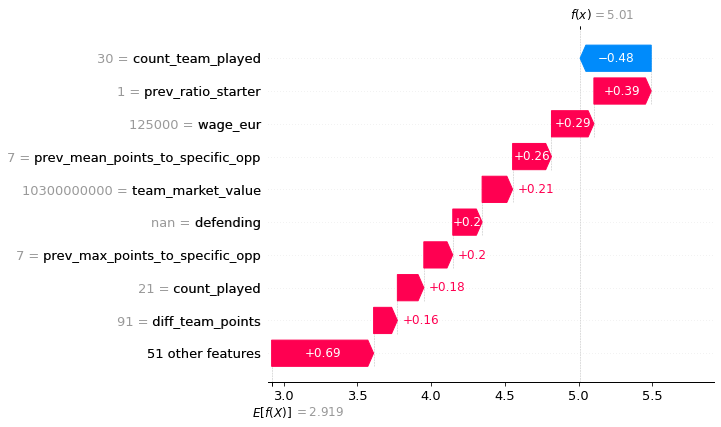

In [46]:
player_to_watch(shap_obj, test, "Hugo Lloris")

Evaluating points for:  Gianluigi Donnarumma


,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate,predicted_roi,predicted_points
190,Gianluigi Donnarumma,2021-06-20 18:00:00,European Championship 2020,Italy,Wales,NaN,NaN,GK,2021,6,20,NaN,5.5,1.0,6.0,0.0,0.0,5.0,0.0,0.0,7.0,1.949359,0.0,0.0,90.0,1.0,21.0,0.0,0.0,0.666667,29.0,NaN,NaN,NaN,0.724138,7,7,1642,17,17,1570,0.0,0.0,0.0,0.0,0.0,NaN,27.8,7.640000e+09,293800000.0,25.6,1.767500e+09,68000000.0,21.0,196.0,90.0,1.0,85.0,92.0,34000.0,3.0,NaN,NaN,NaN,NaN,NaN,GK,21.0,NaN,12.0,12.0,12.0,34.0,8.0,28.0,12.0,14.0,24.0,28.0,46.0,54.0,64.0,79.0,38.0,57.0,72.0,34.0,72.0,18.0,30.0,26.0,14.0,50.0,24.0,68.0,14.0,16.0,89.0,81.0,76.0,83.0,89.0,72,-10,5.872500e+09,225800000.0,2.2,False,False,7.0,NaN,False,Medium,Medium,0.799283,3.764662


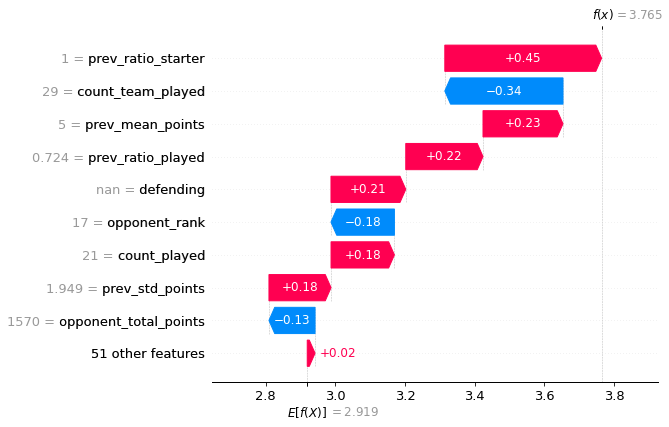

In [47]:
player_to_watch(shap_obj, test, "Gianluigi Donnarumma")

## Defender

In [48]:
views[(views["position"] == "D")].head(20)

,player,team_name,opponent_name,position,value,predicted_roi,predicted_points,final_score,last_md_points,prev_max_points,prev_mean_points,prev_std_points,clean_sheet_consistency,sel_per
66,Benjamin Pavard,France,Portugal,D,6.0,0.820809,4.656990,2.548703,1.0,9.0,3.304348,2.618722,0.347826,5
502,Robin Gosens,Germany,Hungary,D,5.0,1.050009,3.743616,2.022626,14.0,14.0,3.285714,5.089672,0.000000,6
413,Mikael Lustig,Sweden,Poland,D,5.0,0.664925,3.949350,1.778691,6.0,9.0,4.428571,2.440501,0.571429,0
577,Toby Alderweireld,Belgium,Finland,D,5.5,0.699301,3.889292,1.765082,2.0,12.0,4.384615,3.225857,0.500000,5
247,Jere Uronen,Finland,Belgium,D,4.6,0.918326,3.360891,1.554677,2.0,9.0,3.846154,3.105000,0.538462,2
371,Marcus Danielson,Sweden,Poland,D,4.5,0.792068,3.505054,1.539802,6.0,12.0,6.000000,3.964125,0.625000,1
491,Ricardo Rodríguez,Switzerland,Turkey,D,5.5,0.762226,3.513998,1.514958,1.0,12.0,3.625000,3.104170,0.291667,2
596,Victor Lindelöf,Sweden,Poland,D,5.5,0.634899,3.562987,1.418146,6.0,12.0,4.176471,3.661204,0.470588,2
434,Niklas Süle,Germany,Hungary,D,5.5,0.488778,3.599791,1.290565,1.0,12.0,2.736842,3.088367,0.263158,1
431,Nico Elvedi,Switzerland,Turkey,D,4.5,0.709890,3.101086,1.107632,1.0,7.0,2.761905,2.427030,0.238095,1


Evaluating points for:  Kyle Walker


,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate,predicted_roi,predicted_points
313,Kyle Walker,2021-06-22 21:00:00,European Championship 2020,England,Czech Republic,NaN,NaN,D,2021,6,22,NaN,5.5,2.0,0.0,0.0,0.0,3.176471,0.0,0.058824,9.0,2.505875,0.0,0.242536,90.0,0.823529,17.0,0.0,0.058824,0.470588,29.0,0.0,6.0,6.0,0.586207,4,4,1686,40,40,1458,1.0,1.0,0.0,6.0,2.0,5.0,25.4,1.250000e+10,498000000.0,27.4,1.900000e+09,73100000.0,30.0,183.0,70.0,1.0,85.0,85.0,170000.0,3.0,92.0,63.0,76.0,77.0,80.0,NaN,NaN,82.0,81.0,51.0,74.0,78.0,57.0,79.0,76.0,71.0,76.0,79.0,90.0,94.0,66.0,84.0,69.0,86.0,83.0,89.0,79.0,69.0,78.0,80.0,68.0,69.0,63.0,75.0,83.0,82.0,12.0,6.0,16.0,15.0,8.0,228,-36,1.060000e+10,424900000.0,-2.0,True,True,0.0,NaN,False,High,High,0.426681,2.63057


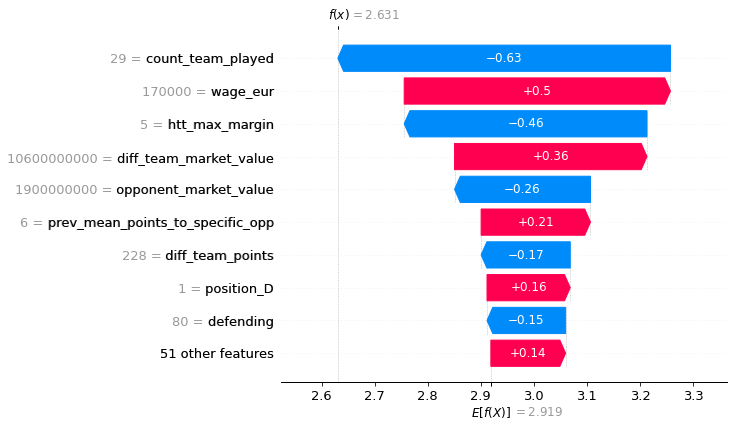

In [49]:
player_to_watch(shap_obj, test, "Kyle Walker")

Evaluating points for:  Jan Vertonghen


,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate,predicted_roi,predicted_points
232,Jan Vertonghen,2021-06-21 21:00:00,European Championship 2020,Belgium,Finland,NaN,NaN,D,2021,6,21,NaN,5.5,2.0,2.0,0.0,0.0,4.45,0.0,0.0,6.0,2.187885,0.0,0.0,90.0,1.0,20.0,0.0,0.0,0.65,29.0,NaN,NaN,NaN,0.689655,1,1,1783,54,54,1410,0.0,1.0,2.0,2.0,3.0,1.0,29.2,6.694000e+09,257500000.0,28.0,446000000.0,17200000.0,33.0,189.0,86.0,1.0,83.0,83.0,21000.0,3.0,58.0,62.0,72.0,71.0,85.0,LCB,5.0,78.0,70.0,54.0,78.0,77.0,52.0,70.0,66.0,70.0,73.0,77.0,55.0,61.0,56.0,82.0,60.0,80.0,83.0,72.0,79.0,66.0,84.0,85.0,56.0,66.0,66.0,81.0,85.0,86.0,6.0,10.0,9.0,12.0,7.0,373,-53,6.248000e+09,240300000.0,1.2,True,True,0.0,NaN,False,High,High,0.70442,3.581121


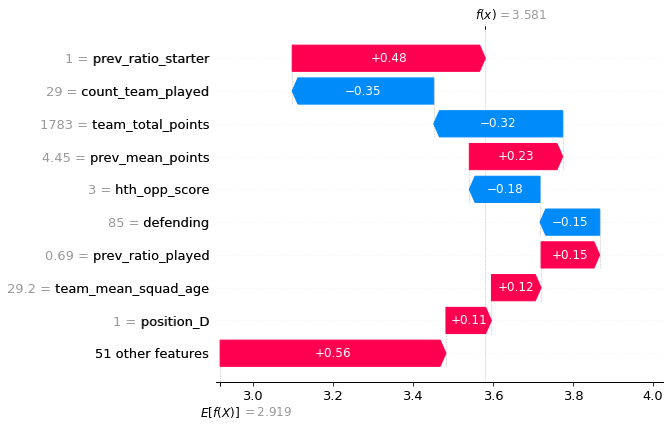

In [50]:
player_to_watch(shap_obj, test, "Jan Vertonghen")

## Midfielder

In [51]:
views[(views["position"] == "M")].head(30)

,player,team_name,opponent_name,position,value,predicted_roi,predicted_points,final_score,last_md_points,prev_max_points,prev_mean_points,prev_std_points,clean_sheet_consistency,sel_per
483,Raheem Sterling,England,Czech Republic,M,9.5,0.486934,4.998775,2.475895,3.0,18.0,6.789474,5.223653,0.578947,5
166,Emil Forsberg,Sweden,Poland,M,7.5,0.559338,4.649263,2.257955,8.0,8.0,3.294118,1.992633,0.411765,1
533,Serge Gnabry,Germany,Hungary,M,9.5,0.335363,4.762919,2.110980,2.0,17.0,6.200000,4.287067,0.350000,4
588,Toni Kroos,Germany,Hungary,M,7.0,0.407503,4.173036,1.688748,2.0,16.0,3.882353,3.638034,0.176471,5
613,Xherdan Shaqiri,Switzerland,Turkey,M,7.0,0.616397,3.681884,1.498945,2.0,8.0,3.411765,2.670647,0.176471,3
160,Eden Hazard,Belgium,Finland,M,10.0,0.385936,3.960884,1.485251,4.0,15.0,6.062500,3.991136,0.500000,2
223,Ilkay Gündogan,Germany,Hungary,M,7.5,0.384232,3.954813,1.478246,2.0,16.0,3.800000,3.664912,0.250000,6
292,Kai Havertz,Germany,Hungary,M,9.0,0.368628,3.869392,1.388789,6.0,10.0,4.466667,3.067495,0.266667,4
361,Manuel Locatelli,Italy,Wales,M,5.5,1.058376,2.922648,1.334954,14.0,14.0,4.272727,3.580249,0.727273,7
226,Ivan Perisic,Croatia,Scotland,M,8.5,0.569941,3.261039,1.091276,7.0,9.0,3.230769,2.518852,0.153846,2


Evaluating points for:  Raheem Sterling


,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate,predicted_roi,predicted_points
472,Raheem Sterling,2021-06-22 21:00:00,European Championship 2020,England,Czech Republic,NaN,NaN,M,2021,6,22,NaN,9.5,3.0,3.0,0.0,0.0,6.789474,0.0,0.315789,18.0,5.223653,0.885226,0.582393,90.0,1.0,19.0,0.473684,0.263158,0.578947,29.0,3.0,18.0,9.5,0.655172,4,4,1686,40,40,1458,1.0,1.0,0.0,6.0,2.0,5.0,25.4,1.250000e+10,498000000.0,27.4,1.900000e+09,73100000.0,25.0,170.0,69.0,1.0,88.0,90.0,270000.0,3.0,93.0,81.0,79.0,90.0,45.0,LW,7.0,67.0,78.0,85.0,46.0,84.0,67.0,90.0,77.0,63.0,69.0,88.0,96.0,90.0,94.0,90.0,94.0,78.0,57.0,79.0,65.0,79.0,59.0,30.0,92.0,82.0,69.0,80.0,53.0,47.0,15.0,12.0,12.0,15.0,9.0,228,-36,1.060000e+10,424900000.0,-2.0,False,True,2.0,NaN,False,High,Medium,0.486934,4.998775


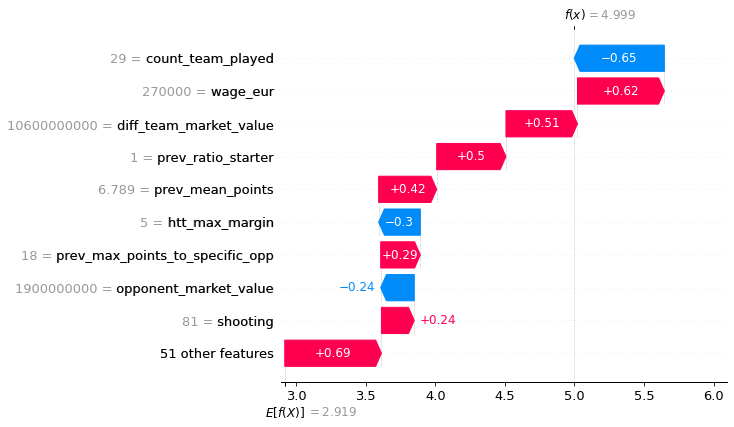

In [52]:
player_to_watch(shap_obj, test, "Raheem Sterling")

Evaluating points for:  Ruslan Malinovskiy


,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate,predicted_roi,predicted_points
508,Ruslan Malinovskiy,2021-06-21 18:00:00,European Championship 2020,Ukraine,Austria,NaN,NaN,M,2021,6,21,NaN,7.0,3.0,0.0,0.0,0.0,3.708333,0.0,0.166667,13.0,3.303215,0.53161,0.481543,90.0,0.916667,24.0,0.208333,0.125,0.291667,27.0,NaN,NaN,NaN,0.888889,22,24,1514,22,23,1523,1.0,1.0,0.0,4.0,4.0,1.0,26.4,1.972000e+09,75800000.0,27.9,3.206000e+09,123300000.0,27.0,181.0,79.0,1.0,79.0,80.0,58000.0,1.0,70.0,79.0,81.0,78.0,66.0,NaN,NaN,79.0,79.0,73.0,75.0,82.0,70.0,81.0,85.0,88.0,81.0,82.0,68.0,71.0,62.0,74.0,65.0,90.0,71.0,81.0,79.0,87.0,78.0,66.0,70.0,79.0,83.0,75.0,72.0,50.0,6.0,6.0,12.0,15.0,13.0,-9,1,-1.234000e+09,-47500000.0,-1.5,True,False,1.0,NaN,False,High,High,0.386294,2.196836


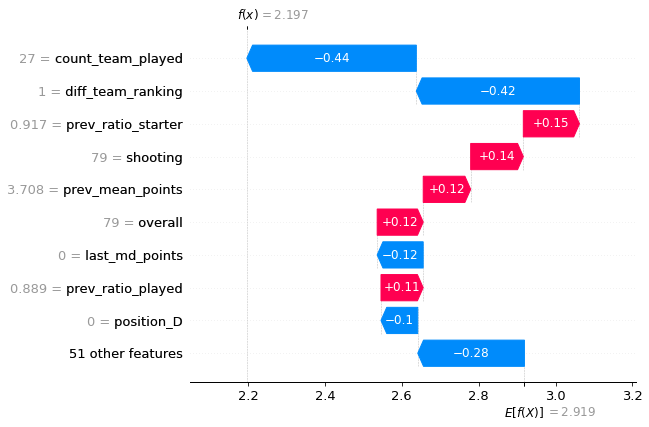

In [53]:
player_to_watch(shap_obj, test, "Ruslan Malinovskiy")

## Forward

In [54]:
views[views["position"] == "F"].head(20)

,player,team_name,opponent_name,position,value,predicted_roi,predicted_points,final_score,last_md_points,prev_max_points,prev_mean_points,prev_std_points,clean_sheet_consistency,sel_per
216,Haris Seferovic,Switzerland,Turkey,F,8.5,0.367040,3.793403,1.322569,1.0,13.0,3.761905,3.080662,0.190476,0
457,Patrik Schick,Czech Republic,England,F,8.2,0.521213,3.366203,1.127569,8.0,12.0,4.750000,4.041452,0.250000,3
370,Marcus Berg,Sweden,Poland,F,8.5,0.349753,3.381987,0.954607,2.0,9.0,2.875000,2.091650,0.416667,0
206,Goran Pandev,North Macedonia,Netherlands,F,6.5,0.606462,2.903718,0.827708,4.0,12.0,3.360000,2.659574,0.200000,1
54,Artem Dzyuba,Russia,Denmark,F,8.5,0.446826,3.039671,0.769587,5.0,19.0,5.291667,4.759240,0.458333,1
153,Dries Mertens,Belgium,Finland,F,9.0,0.425236,3.062792,0.765744,1.0,9.0,3.347826,2.569200,0.391304,3
46,Antoine Griezmann,France,Portugal,F,11.0,0.298855,2.810918,0.414613,6.0,10.0,4.066667,3.016430,0.433333,5
628,Álvaro Morata,Spain,Slovakia,F,9.0,0.382437,2.651561,0.370210,6.0,10.0,3.388889,2.637710,0.333333,3
514,Roman Yaremchuk,Ukraine,Austria,F,7.1,0.390819,2.594830,0.331171,6.0,9.0,3.608696,2.369103,0.304348,5
193,Gareth Bale,Wales,Italy,F,9.5,0.348476,2.646287,0.328821,9.0,9.0,3.545455,2.649839,0.272727,5


Evaluating points for:  Harry Kane


,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate,predicted_roi,predicted_points
207,Harry Kane,2021-06-22 21:00:00,European Championship 2020,England,Czech Republic,NaN,NaN,F,2021,6,22,NaN,11.5,4.0,2.0,0.0,0.0,5.2,0.0,0.36,17.0,4.453463,0.866025,0.757188,90.0,0.88,25.0,0.44,0.24,0.48,29.0,1.0,6.0,6.0,0.862069,4,4,1686,40,40,1458,1.0,1.0,0.0,6.0,2.0,5.0,25.4,1.250000e+10,498000000.0,27.4,1.900000e+09,73100000.0,26.0,188.0,89.0,1.0,88.0,89.0,220000.0,3.0,68.0,91.0,80.0,80.0,47.0,ST,9.0,83.0,75.0,94.0,85.0,81.0,85.0,80.0,80.0,68.0,83.0,84.0,66.0,69.0,69.0,90.0,73.0,91.0,79.0,84.0,84.0,86.0,81.0,35.0,93.0,83.0,90.0,91.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,228,-36,1.060000e+10,424900000.0,-2.0,True,True,1.0,NaN,False,High,High,0.360398,4.169222


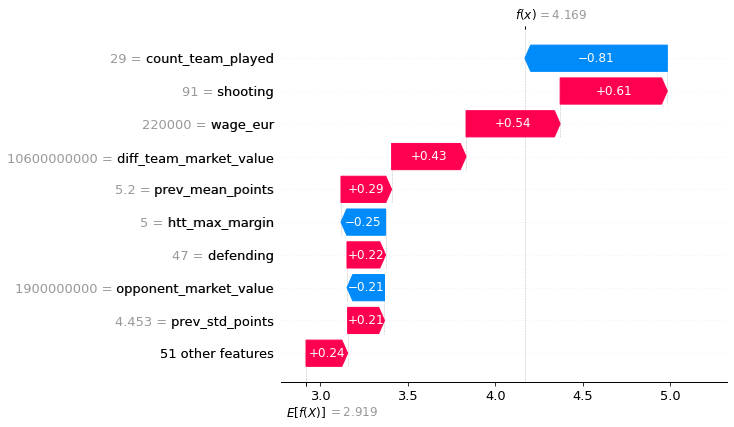

In [55]:
player_to_watch(shap_obj, test, "Harry Kane")

Evaluating points for:  Artem Dzyuba


,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate,predicted_roi,predicted_points
51,Artem Dzyuba,2021-06-21 21:00:00,European Championship 2020,Russia,Denmark,NaN,NaN,F,2021,6,21,NaN,8.5,4.0,5.0,0.0,1.0,5.291667,0.0,0.333333,19.0,4.75924,1.013496,0.56466,90.0,1.0,24.0,0.375,0.291667,0.458333,29.0,NaN,NaN,NaN,0.827586,32,38,1462,9,10,1631,1.0,0.0,0.0,2.0,0.0,2.0,27.9,1.908000e+09,73400000.0,27.7,3.107000e+09,119500000.0,31.0,196.0,91.0,NaN,79.0,79.0,0.0,2.0,68.0,78.0,69.0,71.0,29.0,ST,22.0,85.0,61.0,81.0,87.0,77.0,74.0,73.0,66.0,60.0,57.0,77.0,67.0,69.0,55.0,75.0,35.0,80.0,65.0,78.0,93.0,69.0,80.0,30.0,81.0,77.0,83.0,79.0,17.0,21.0,15.0,12.0,11.0,11.0,8.0,-169,28,-1.199000e+09,-46100000.0,0.2,True,True,0.0,NaN,False,Medium,Low,0.446826,3.039671


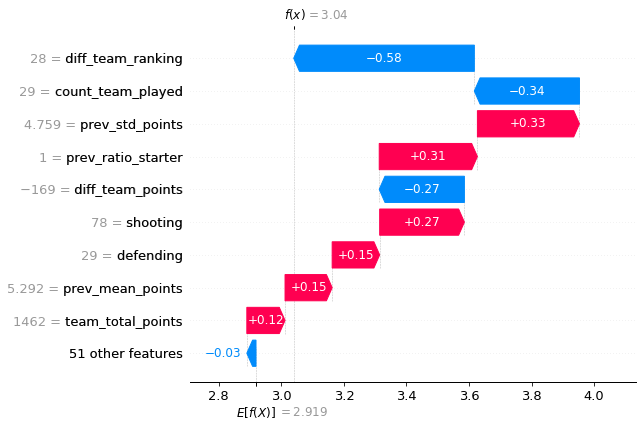

In [56]:
player_to_watch(shap_obj, test, "Artem Dzyuba")